# Group-Level comparison of Epoch-Based Decoding Performance

This script aggregates  decoding curves of P300 workflow variants.




In [1]:
import os
from os.path import join
import numpy as np
from scipy.stats import pearsonr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.covariance import LedoitWolf
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm
warnings.filterwarnings("ignore")

wd = r'C:\Users\Radovan\OneDrive\Radboud\Studentships\Jordy Thielen\root'
os.chdir(wd)
data_dir = join(wd, "data")
experiment_dir = join(data_dir, "experiment")
files_dir = join(experiment_dir, 'files')
sourcedata_dir = join(experiment_dir, 'sourcedata')
derivatives_dir = join(join(experiment_dir, 'derivatives'))
analysis_dir = join(data_dir, "analysis")
p300_dir = join(analysis_dir, "p300")
decoding_results_dir = join(p300_dir, "decoding_results") 
plots_dir = join(p300_dir, "plots")
features_dir = join(plots_dir, "features")

subjects = ["VPpdia","VPpdib", "VPpdic", "VPpdid", "VPpdie", "VPpdif", "VPpdig","VPpdih", "VPpdii", "VPpdij",
            "VPpdik", "VPpdil", "VPpdim", "VPpdin", "VPpdio", "VPpdip", "VPpdiq", "VPpdir", "VPpdis", "VPpdit",
            "VPpdiu", "VPpdiv", "VPpdiw", "VPpdix","VPpdiy", "VPpdiz", "VPpdiza", "VPpdizb", "VPpdizc"]

In [2]:
def load_decoding_results(npz_path):
    with np.load(npz_path) as data:
        epoch_bins_loaded = data['epoch_bins']
        mean_acc = data['mean_accuracies']
        se_acc = data['se_accuracies']
    return epoch_bins_loaded, mean_acc, se_acc


In [3]:

epoch_bins = np.linspace(5, 80, 16, dtype=int)
task = 'covert'

# Full paths
# Data1 => with rejections
# Data2 => without rejections
data1_path = os.path.join(decoding_results_dir, f"{task}_lda_p300_decC_results_w_reject.npz")
data2_path = os.path.join(decoding_results_dir, f"{task}_lda_p300_decC_results_wo_reject.npz" )
data3_path = os.path.join(decoding_results_dir, f"{task}_lda_p300_decC_results_wo_baselinecorrect.npz" )

epoch_bins1, mean_acc1, se_acc1 = load_decoding_results(data1_path)
epoch_bins2, mean_acc2, se_acc2 = load_decoding_results(data2_path)
epoch_bins3, mean_acc3, se_acc3 = load_decoding_results(data3_path)


data = {
    'w/ rejection': {
        'mean': mean_acc1,
        'se': se_acc1,
        'color': 'tab:orange',
        'marker': 'o'
    },
    'wo/ rejection': {
        'mean': mean_acc2,
        'se': se_acc2,
        'color': 'tab:blue',
        'marker': 's'
    },
    'wo/ baseline_rejection': {
        'mean': mean_acc3,
        'se': se_acc3,
        'color': 'tab:green',
        'marker': 's'
}
}

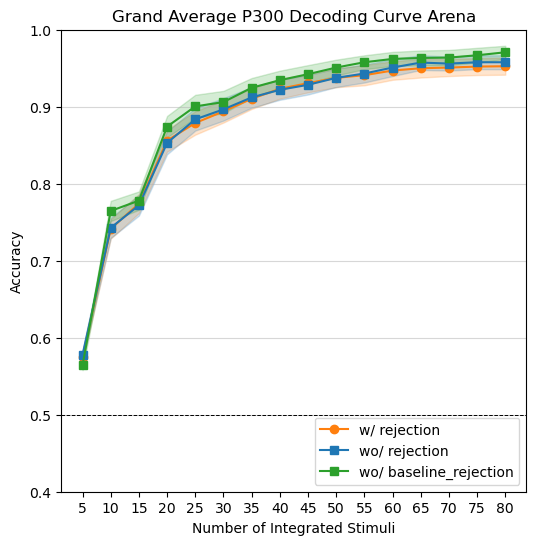

Orange: 0.95 ± 0.01
Blue: 0.96 ± 0.01
Green: 0.97 ± 0.01


In [4]:

plt.figure(figsize=(6, 6))

# Plot both datasets
for label, dataset in data.items():
    plt.plot(epoch_bins, dataset['mean'], marker=dataset['marker'], linestyle='-', color=dataset['color'], label=label)
    plt.fill_between(epoch_bins, dataset['mean'] - dataset['se'], dataset['mean'] + dataset['se'],
                     color=dataset['color'], alpha=0.2)

 # Chance 
plt.axhline(y=0.5, color='k', linestyle='--', linewidth=.7, label='') 

# Customize axes
plt.xlabel("Number of Integrated Stimuli", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.ylim(0.4, 1.0)
plt.xticks(epoch_bins)
plt.title("Grand Average P300 Decoding Curve Arena", fontsize=12)
plt.grid(alpha=0.5, axis='y')

# Handle legend to avoid duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right', fontsize=10)

# Save the figure
save_dir = os.path.join(plots_dir, 'decoding')
save_png = os.path.join(save_dir, f"{task}_lda_p300_decC_results_comparison.png")
save_svg = os.path.join(save_dir, f"{task}_lda_p300_decC_results_comparison.svg")

plt.savefig(save_png, dpi=300, bbox_inches='tight')
plt.savefig(save_svg, dpi=300, bbox_inches='tight')
plt.show()


print(f"Orange: {data['w/ rejection']['mean'][-1]:.2f} ± { data['w/ rejection']['se'][-1]:.2f}")
print(f"Blue: {data['wo/ rejection']['mean'][-1]:.2f} ± { data['wo/ rejection']['se'][-1]:.2f}")
print(f"Green: {data['wo/ baseline_rejection']['mean'][-1]:.2f} ± { data['wo/ baseline_rejection']['se'][-1]:.2f}")


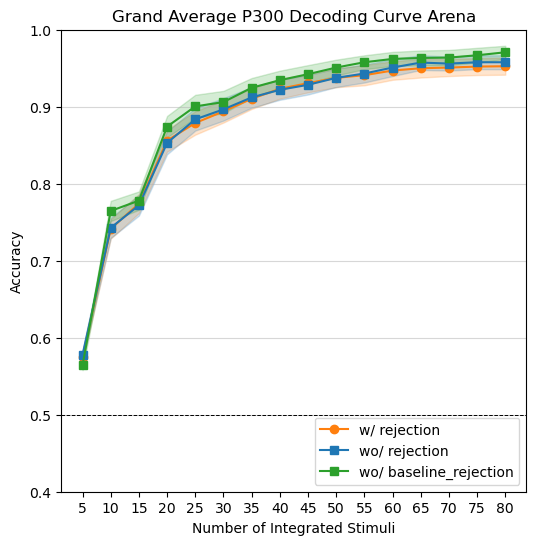

Orange (w/ rejection): 0.95 ± 0.01
Blue (wo/ rejection): 0.96 ± 0.01
Green (wo/ baseline rejection): 0.97 ± 0.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

# --- Data definitions ---
# Assume the following arrays are defined:
# epoch_bins, mean_acc1, mean_acc2, mean_acc3, se_acc1, se_acc2, se_acc3
# Also, plots_dir and task are assumed to be defined.

data = {
    'w/ rejection': {
        'mean': mean_acc1,
        'se': se_acc1,
        'color': 'tab:orange',
        'marker': 'o'
    },
    'wo/ rejection': {
        'mean': mean_acc2,
        'se': se_acc2,
        'color': 'tab:blue',
        'marker': 's'
    },
    'wo/ baseline_rejection': {
        'mean': mean_acc3,
        'se': se_acc3,
        'color': 'tab:green',
        'marker': 's'
    }
}

plt.figure(figsize=(6, 6))

# --- Plotting curves with SE bands ---
for label, dataset in data.items():
    plt.plot(epoch_bins, dataset['mean'], marker=dataset['marker'], linestyle='-',
             color=dataset['color'], label=label)
    plt.fill_between(epoch_bins,
                     np.array(dataset['mean']) - np.array(dataset['se']),
                     np.array(dataset['mean']) + np.array(dataset['se']),
                     color=dataset['color'], alpha=0.2)

# --- Significance testing between curves based on SE ---
# : Compare "w/ rejection" vs "wo/ rejection"
mean1 = np.array(data['wo/ baseline_rejection']['mean'])
mean2 = np.array(data['w/ rejection']['mean'])
se1 = np.array(data['wo/ baseline_rejection']['se'])
se2 = np.array(data['w/ rejection']['se'])

# Compute z-values and two-tailed p-values
z_values = (mean1 - mean2) / np.sqrt(se1**2 + se2**2)
p_values = norm.sf(np.abs(z_values))

# Mark significant differences with a star (*) if p < 0.05
for i, epoch in enumerate(epoch_bins):
    if p_values[i] < 0.05:
        # Determine the top of the error bar for the two curves at this epoch
        y_top = max(mean1[i] + se1[i], mean2[i] + se2[i])
        plt.text(epoch, y_top + 0.02, '*', fontsize=12, ha='center', color='black')

# --- Additional plot customization ---
# Plot chance level line
plt.axhline(y=0.5, color='k', linestyle='--', linewidth=0.7)

plt.xlabel("Number of Integrated Stimuli", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.ylim(0.4, 1.0)
plt.xticks(epoch_bins)
plt.title("Grand Average P300 Decoding Curve Arena", fontsize=12)
plt.grid(alpha=0.5, axis='y')

# Remove duplicate legend labels if any
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right', fontsize=10)

# --- Save and show the figure ---
save_dir = os.path.join(plots_dir, 'decoding')
os.makedirs(save_dir, exist_ok=True)
save_png = os.path.join(save_dir, f"{task}_lda_p300_decC_results_comparison.png")
save_svg = os.path.join(save_dir, f"{task}_lda_p300_decC_results_comparison.svg")

plt.savefig(save_png, dpi=300, bbox_inches='tight')
plt.savefig(save_svg, dpi=300, bbox_inches='tight')
plt.show()

# --- Print last value with SE for each curve ---
print(f"Orange (w/ rejection): {data['w/ rejection']['mean'][-1]:.2f} ± {data['w/ rejection']['se'][-1]:.2f}")
print(f"Blue (wo/ rejection): {data['wo/ rejection']['mean'][-1]:.2f} ± {data['wo/ rejection']['se'][-1]:.2f}")
print(f"Green (wo/ baseline rejection): {data['wo/ baseline_rejection']['mean'][-1]:.2f} ± {data['wo/ baseline_rejection']['se'][-1]:.2f}")
 